# General Python Tutorial

The tutorial is designed to touch upon 
> 1. Finding data from ArcGIS Hub

> 2. Loading and Visualizing it using ArcGIS API for Python (API)

> 3. Extract it as a Python dataframe for basic exploratory analysis

> 4. Query the data for specific results using the API

> 5. Customize map results using API

Let's start from the bare basics..

1. For those new to Python, [here](http://www.pythonforbeginners.com/basics/python-websites-tutorials) is a list of online resourses available to learn and familiarize yourself with Python.

2. [Anaconda](https://www.continuum.io/downloads), an open source distribution of R and Python is used to install Python version 3.6. All the packages used in the next code cell (except geopandas) come along with the Anaconda installation of Python.

3. To install geopandas, execute the following command _after_ Anaconda has been installed.

__`conda install -c conda-forge geopandas`__

We start by importing necessary packages

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

A simple breakdown of these packages..

> [__Pandas__](https://pypi.python.org/pypi/pandas/) : To load data as a table and enable working with tabular data.

> [__Geopandas__](https://pypi.python.org/pypi/geopandas/0.2.1) : An extension of Pandas that supports working with geospatial data.

> [__Numpy__](https://pypi.python.org/pypi/numpy/1.13.1) : Supports array processing for numbers, strings, records and objects

> [__Matplotlib__](https://pypi.python.org/pypi/matplotlib/2.0.2) : Package for plotting and Python visualization

> [__Seaborn__](https://pypi.python.org/pypi/seaborn/0.8) : Package for making attractive and informative statistical graphics in Python


The last two lines of code in the cell above, adopt the color styles of seaborn and allow for displaying plots within this notebook, as opposed to displaying them in another browser window.

## Step 1: Finding data from ArcGIS hub

Look for the dataset in the search bar as shown on the [ArcGIS hub Open Data](http://hub.arcgis.com/pages/open-data) page.

The dataset used through this tutorial is the [DC Bicyclelanes](opendata.dc.gov/datasets/bicycle-lanes) dataset.

The Bicycle Lanes dataset for DC contains information such as length of the bike lane, year installed, additional notes, segment id for the street it falls on, etc for each bike lane. Additional information about each field in the dataset can be found [here](http://www.arcgis.com/sharing/rest/content/items/294e062cdf2c48d5b9cbc374d9709bc0/info/metadata/metadata.xml?format=default&output=html).

![search](https://raw.githubusercontent.com/ManushiM/Esri_Tutorials/master/tutorial1_hub-pythonAPI/home.PNG)

When you click on the dataset in the search results, it takes you to the details of the dastaset. Click on the __'API Explorer'__ tab as shown below.

![overview](https://raw.githubusercontent.com/ManushiM/Esri_Tutorials/master/tutorial1_hub-pythonAPI/overview.PNG)

Once under the 'API Explorer' tab, copy only the selected portion of the 'Query URL'. This ensures that that the data is __not returned in the JSON format__.

![query](https://raw.githubusercontent.com/ManushiM/Esri_Tutorials/master/tutorial1_hub-pythonAPI/serviceURL.PNG)

## Step 2.1: Loading the data using ArcGIS API for Python

The copied URL is stored in the variable __lyr_url__ and using the __arcgis__ package of Python it is loaded as a feature/map layer in Python

The __arcgis__ Python package allows automating tasks that integrate big data analysis with one's web GIS. 

It can be installed using [conda](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-using-Conda) as well.

In [2]:
from arcgis.features import FeatureLayer
lyr_url = 'https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2'

bike_layer = FeatureLayer(lyr_url)
bike_layer

<FeatureLayer url:"https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2">

To learn more about the package and its usage follow this [link](https://developers.arcgis.com/python/guide/overview-of-the-arcgis-api-for-python/).

Experienced Python users could also read the [API docs](http://esri.github.io/arcgis-python-api/apidoc/html/).


Using the following lines of code, we output the fields/attributes of the dataset

In [3]:
for f in bike_layer.properties.fields:
    print(f['name'])

OBJECTID
FACILITYID
STREETSEGID
SOURCEID
BIKELANELENGTH
FACILITY
PROPOSEDCYCLETRACK
Shape
Shape_Length
TRAVELDIRECTION
NOTES
BIKELANE_YEAR
PLANSREADY
GAP
GAP_NOTES
NEED_SYMBOL
NEED_SYM_1
REPAINT_LINE
YEAR_INSTALLED


We now retreive the entire dataset in __all_features__ and get a count of all the rows in the dataset

In [4]:
all_features = bike_layer.query()
print('Total number of rows in the dataset: ')
print(len(all_features.features))

Total number of rows in the dataset: 
1370


## Step 2.2: Visualizing it using the API

In [5]:
from arcgis.gis import GIS
gis = GIS()

#Here we select a zoom level of 13, purely based on judgement of location and data to be displayed
map1 = gis.map('Washington, DC', 13)

In the following step we add the Bikelanes as a layer superimposing the basemap of Washington, DC initialized above.

The "url" attribute is provided with the __Service URL__

In [6]:
map1.add_layer({"type":"FeatureLayer",
                "url":"https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2",
               })
map1

![map1](https://raw.githubusercontent.com/ManushiM/Esri_Tutorials/master/tutorial1_hub-pythonAPI/map1.PNG)

## Step 3.1: Loading the data as a Pandas DataFrame

The variable __all_features__ is of datatype arcgis FeatureSet.

In order to use this data as a tabular dataset, we need to store it as a Pandas DataFrame, as shown below.

In [7]:
#store as dataframe
data = all_features.df

#View first 5 rows
data.head()

,BIKELANELENGTH,BIKELANE_YEAR,FACILITY,FACILITYID,GAP,GAP_NOTES,NEED_SYMBOL,NEED_SYM_1,NOTES,OBJECTID,PLANSREADY,PROPOSEDCYCLETRACK,REPAINT_LINE,SOURCEID,STREETSEGID,Shape_Length,TRAVELDIRECTION,YEAR_INSTALLED,SHAPE
0,0.009455,0,Existing Bike Lane,SEGID- 9854,,,None,None,,1,,,None,15135550,9854,15.216846,,2008,"{'paths': [[[-8573273.977615476, 4715455.45970..."
1,0.076754,0,Existing Bike Lane,SEGID- 10198,,,None,None,"COG 95, 1975 plan, public input",2,,,None,15135555,10198,123.524976,,2008,"{'paths': [[[-8573264.662602307, 4715472.71048..."
2,0.058610,0,Existing Bike Lane,SEGID- 9167,,,None,None,"COG 95, 1975 plan, public input",3,,,None,15135560,9167,94.322895,,2008,"{'paths': [[[-8573183.827335583, 4715609.70743..."
3,0.026891,0,Existing Bike Lane,SEGID- 12337,,,None,None,"COG 95, 1975 plan, public input",4,,,None,15135565,12337,43.276471,,2008,"{'paths': [[[-8573122.896706875, 4715714.84043..."
4,0.172385,0,Existing Bike Lane,SEGID- 10611,,,None,None,"COG 95, 1975 plan, public input",5,,,None,15135580,10611,277.425702,,2008,"{'paths': [[[-8572973.134739578, 4715973.04009..."


Since this is a spatial dataset (contains geometry that can be plotted on a map), we will convert it to a geodataframe to view its details.

In [8]:
data_gdf = gpd.GeoDataFrame(data)
data_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 19 columns):
BIKELANELENGTH        1370 non-null float64
BIKELANE_YEAR         1370 non-null int64
FACILITY              1370 non-null object
FACILITYID            1370 non-null object
GAP                   1370 non-null object
GAP_NOTES             1370 non-null object
NEED_SYMBOL           0 non-null object
NEED_SYM_1            0 non-null object
NOTES                 1370 non-null object
OBJECTID              1370 non-null int64
PLANSREADY            1370 non-null object
PROPOSEDCYCLETRACK    1370 non-null object
REPAINT_LINE          0 non-null object
SOURCEID              1370 non-null object
STREETSEGID           1370 non-null int64
Shape_Length          1370 non-null float64
TRAVELDIRECTION       1370 non-null object
YEAR_INSTALLED        1370 non-null int64
SHAPE                 1370 non-null object
dtypes: float64(2), int64(4), object(13)
memory usage: 203.4+ KB


#### The result above shows that this dataset has 1370 rows and 19 columns, of which 3 columns (NEED_SYMBOL, NEED_SYM_1, REPAINT_LINE) have no data. We can also find the datatype of each column from this result.

## Step 3.2: Basic exploratory analysis

Let's start by computing the total distance of bike lanes in DC

In [9]:
np.sum(data['BIKELANELENGTH'])

96.47902169999992

#### We just found out the total coverage of bike lanes in DC, which is approximately 96.48 decimal miles.


* Similarly we could also use __`np.mean(array_name)`__ and __`np.median(array_name)`__ to compute those values.

We will now find the types of bike lanes stored in the column __'FACILITY'__ and visualize the number of bike lanes based on type.

In [10]:
#Gives unique values in a dataframe column
data['FACILITY'].unique()

array(['Existing Bike Lane', 'Shared Lane', 'Climbing Lane', 'Cycle Track',
       'Contraflow Bike Lane', 'Bus/Bike Lane', ' '], dtype=object)

Let's now find the number of bike lanes of each unique type (frequency) and store it in the variable __counts__

In [11]:
counts = data['FACILITY'].value_counts()

In [12]:
print(counts)

Existing Bike Lane      908
Shared Lane             258
Cycle Track              88
Climbing Lane            62
Contraflow Bike Lane     45
                          5
Bus/Bike Lane             4
Name: FACILITY, dtype: int64


We will now visualize __counts__ as a bar chart

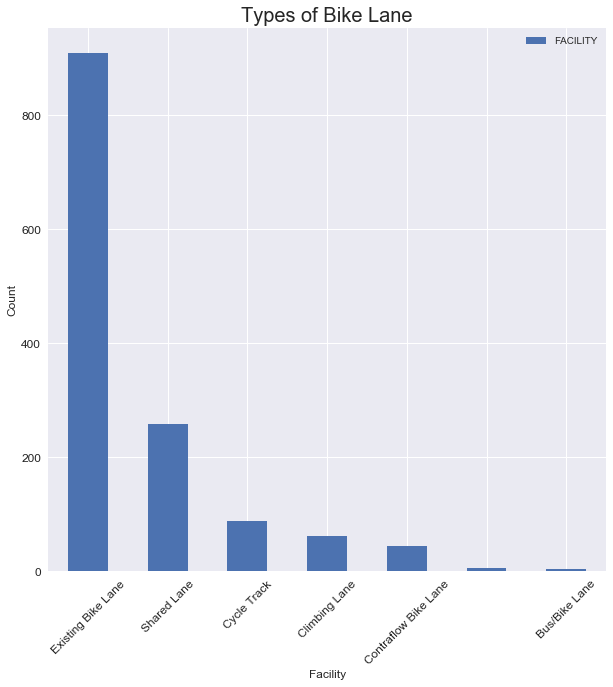

In [13]:
#Generates bar graph
ax = counts.plot(kind='bar', figsize=(10, 10), legend=True, fontsize=12)

#X axis text and display style of categories
ax.set_xlabel("Facility", fontsize=12)
plt.xticks(rotation=45)

#Y axis text
ax.set_ylabel("Count", fontsize=12)

#Title
ax.set_title("Types of Bike Lane", fontsize=20)

## Step 4: Query the data for specific results

We now try to query the dataset based on certain filters using the __where__ clause qithin the query. 

In this example, we check for _bikes installed in the last 5 years_.

__NOTE:__ These filters can only be applied to NUMERICAL data fields

In [14]:
query_result = bike_layer.query(where="YEAR_INSTALLED>2011")
print('Number of bike lanes installed in the last 5 years (2012-2016): ')
len(query_result.features)

Number of bike lanes installed in the last 5 years (2012-2016): 


566

These results can also be stored as a Pandas DataFrame for analysis.

In [15]:
#store as dataframe
data_5yrs = query_result.df

To get the number of bikes installed each year, we perform a __values_counts()__ on this dataframe over the __`YEAR_INSTALLED`__ field

In [16]:
data_5yrs['YEAR_INSTALLED'].value_counts()

2012    162
2014    160
2015     86
2013     82
2016     76
Name: YEAR_INSTALLED, dtype: int64

## Step 5: Customize map results

Let's start by finding the various unique values in the column __'YEAR_INSTALLED'__

In [17]:
data['YEAR_INSTALLED'].unique()

array([2008, 2005, 1980, 2007, 2010, 2013, 2014, 2002, 2011, 2009, 2004,
       2012, 2006, 2003, 2015, 2016,    0, 2001], dtype=int64)

For the following map, we have used the same location and zoom level.

The only change is the __choice of basemap__ used. The other available basemaps are:

In [18]:
map1.basemaps

['streets',
 'satellite',
 'hybrid',
 'topo',
 'gray',
 'dark-gray',
 'oceans',
 'national-geographic',
 'terrain',
 'osm']

In [19]:
map2 = gis.map('Washington, DC', 13)
#setting a basemap to the map
map2.basemap = 'gray'

Here we use the __ClassedColorRenderer__ in order to render different colors on the map, based on the values in the __field_name__. 

__NOTE:__ The column provided as "field_name" can only be of NUMERICAL data type.

In [20]:
map2.add_layer({"type":"FeatureLayer",
                "url":"https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Transportation_WebMercator/MapServer/2",
                "renderer":"ClassedColorRenderer", "field_name":"YEAR_INSTALLED"
               })
map2

![map2](https://raw.githubusercontent.com/ManushiM/Esri_Tutorials/master/tutorial1_hub-pythonAPI/map2.PNG)

As per the map above, the darker the bike lanes the newer the construction. The lighter bike lanes signify an older year of installation.

## Next Steps:

> Examples of other features that could be added to this map are: 

> 1. The street layer for DC, to estimate what proportion of streets in DC are bike lanes.

> 2. Bike trails of DC to follow routes connected by these bike lanes.

> 3. Demographics data to see if the bike lanes are appropriately connecting the most populous regions

To see other analyses examples of using the ArcGIS API for Python, follow [this](https://github.com/Esri/arcgis-python-api/tree/master/samples/04_gis_analysts_data_scientists) link to the API's Github.